# Word2Vec Skip-Gram From Scratch

This notebook demonstrates how word embeddings are learned using a Skip-gram neural network, visualized using PCA.

Dataset is loaded from `dataset.txt` (one sentence per line).

## Cell 1: Setup and Dataset Loading
Imports libraries and loads the text corpus from an external file.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
with open("dataset.txt", "r") as f:
    corpus = [line.strip() for line in f if line.strip()]

print("Number of sentences:", len(corpus))
print("Total sentences:", corpus)


Number of sentences: 11
Total sentences: ['The future king is the prince', 'Daughter is the princess', 'Son is the prince', 'Only a man can be a king', 'Only a woman can be a queen', 'The princess will be a queen', 'The prince is a strong man', 'The princess is a beautiful woman', 'Prince is only a boy now', 'Prince will be king', 'A boy will be a man']


## Cell 2: Text Preprocessing
Lowercasing, stopword removal, and tokenization.

In [2]:

stop_words = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

def clean_and_tokenize(corpus):
    words = []
    for sentence in corpus:
        tokens = [w for w in sentence.lower().split() if w not in stop_words]
        words.append(tokens)
    return words

tokenized_data = clean_and_tokenize(corpus)

print("Tokenized data:", tokenized_data)


Tokenized data: [['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


## Cell 3: Vocabulary Creation
Builds word-to-index and index-to-word mappings.

In [3]:

vocab = sorted(list(set([word for sentence in tokenized_data for word in sentence])))
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {i: word for i, word in enumerate(vocab)}
vocab_size = len(vocab)

print("Vocabulary Size:", vocab_size)
print("Vocabulary:", vocab)


Vocabulary Size: 12
Vocabulary: ['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


## Cell 4: Skip-Gram Training Pair Generation
Creates (target, context) word pairs using a sliding window.

In [20]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X, Y = [], []
window_size = 2 # Increased window helps capture more context

for sentence in tokenized_data:
    for i, word in enumerate(sentence):
        # Sliding window to capture context words
        for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
            if i != j:
                X.append(word_to_idx[word])
                Y.append(word_to_idx[sentence[j]])

X = np.array(X)
Y = to_categorical(Y, num_classes=vocab_size)
print(f"Training pairs: {X.shape[0]}")

Training pairs: 34


## Cell 5: Neural Network Training
Trains a shallow neural network to learn embeddings.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Increasing embed_size allows for more nuanced semantic vectors
embed_size = 10

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=1),
    Flatten(),
    Dense(vocab_size, activation='softmax')
])

# Using a slightly slower learning rate for more stable cluster formation
optimizer = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print("Training model...")
history = model.fit(X, Y, epochs=500, verbose=0)
print("Training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training model...
Training complete.


##Cell 5.1: Plot in Graph for better Visualization

Final Training Loss: 1.1555


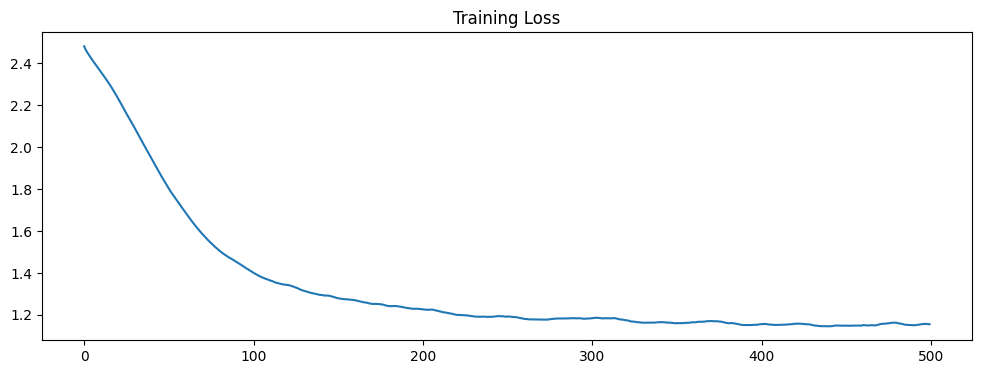

In [22]:
final_loss = history.history['loss'][-1]
print(f"Final Training Loss: {final_loss:.4f}")

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.show()

## Cell 6: Embedding Extraction and PCA Visualization
Reduces embeddings to 2D and plots word clusters.

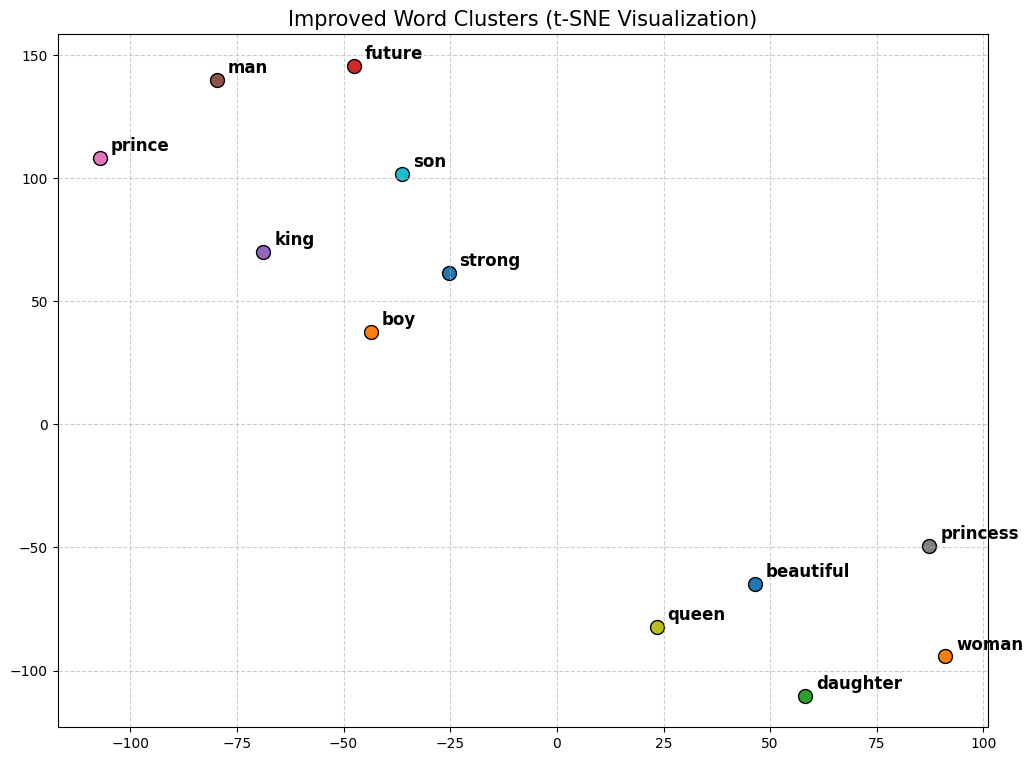

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 1. Extract the high-dimensional weights
weights = model.layers[0].get_weights()[0]

# 2. Use t-SNE for superior cluster visualization
# Perplexity: balance between local and global aspects of your data
tsne = TSNE(n_components=2, perplexity=min(5, len(vocab)-1), random_state=42, init='pca', learning_rate='auto')
reduced_embeddings = tsne.fit_transform(weights)

plt.figure(figsize=(12, 9))

# 3. Plotting with improved aesthetics
for i, word in enumerate(vocab):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, edgecolors='k', s=100)
    plt.annotate(word, (x, y), xytext=(8, 5), textcoords='offset points', fontsize=12, fontweight='bold')

plt.title("Improved Word Clusters (t-SNE Visualization)", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()